# Introdução à Otimização de Hiperparâmetros

## Modelos em Aprendizado de Máquina
No mundo do aprendizado de máquina, um modelo é uma representação de um sistema. Ele é treinado usando um conjunto de dados e, com base nesse treinamento, faz previsões ou toma decisões sem ser explicitamente programado para realizar uma determinada tarefa.

In [1]:
from sklearn.linear_model import LogisticRegression

# Criando um modelo de Regressão Logística
modelo = LogisticRegression()

## Parâmetros vs Hiperparâmetros em Aprendizado de Máquina
Em aprendizado de máquina, o processo de treinamento envolve ajustar os parâmetros do modelo para melhor se adequar aos dados. 

Em contraste, os hiperparâmetros são configurações que influenciam como esse treinamento é realizado.

### Parâmetros:
O que são? São componentes do modelo que são aprendidos diretamente dos dados durante o treinamento.

Exemplo: Nos modelos de redes neurais, os parâmetros são os pesos e biases (viés, um termo que adiciona um valor constante para ajudar o modelo a melhor se ajustar aos dados) que são ajustados através do treinamento.

In [2]:
# Carregando dataset do sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Carregando o dataset de dígitos
data = load_digits()
X = data.data
y = data.target

In [3]:
X.shape

(1797, 64)

In [4]:
y.shape

(1797,)

In [5]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# Dividindo em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma rede neural simples
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilando e treinando o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [7]:
# Mostrando alguns parâmetros (pesos) da primeira camada
weights_first_layer = model.layers[0].get_weights()[0]
print("Pesos da primeira camada:\n", weights_first_layer)

Pesos da primeira camada:
 [[-0.2535444  -0.04623386  0.01215166  0.29440182]
 [ 0.12290097  0.06513654 -0.26723135 -0.20283808]
 [ 0.11979746 -0.01123221 -0.12942833 -0.01233459]
 [ 0.14949992  0.01532787 -0.02331615  0.05312857]
 [ 0.24269274 -0.05200991  0.15702772  0.1794287 ]
 [-0.1026861  -0.17656352  0.13874313 -0.09226205]
 [ 0.3376791  -0.07988566 -0.28726497 -0.11267642]
 [-0.03825092  0.22703423 -0.2635277   0.13942732]
 [-0.10033379  0.25627878 -0.17542839 -0.15350379]
 [-0.01926526 -0.04552732  0.05219663  0.05537149]
 [-0.03725427  0.25403902 -0.08737604 -0.06922361]
 [ 0.14042935  0.24604656 -0.24879183  0.10354564]
 [ 0.05186903  0.19693951 -0.24427955 -0.22938207]
 [-0.2521625  -0.1155393   0.05386365 -0.37129956]
 [-0.0644973   0.06716815  0.22679843  0.04293518]
 [ 0.1962131  -0.10105222 -0.23267733  0.16002305]
 [-0.11378416 -0.02797075 -0.28974319  0.05190909]
 [-0.02648725  0.32177967 -0.1141635   0.14565943]
 [ 0.14379053  0.08383188 -0.15870011  0.26335722]
 [-0

In [8]:
weights_first_layer.shape

(64, 4)

### Hiperparâmetros:
O que são? São configurações que definem aspectos do treinamento e da estrutura do modelo. Não são aprendidos nos dados, mas são configurados antes do treinamento.

Exemplo: Em redes neurais, a taxa de aprendizado, o número de camadas, o número de neurônios em uma camada, e a função de ativação são todos hiperparâmetros.

In [78]:
# Definindo hiperparâmetros para uma rede neural
learning_rate = 0.001
batch_size = 32
epochs = 50
number_of_neurons_layer1 = 128
number_of_neurons_layer2 = 64
number_of_neurons_layer3 = 128
activation_function = 'relu'

# Criando um modelo usando os hiperparâmetros
model = Sequential()
model.add(Dense(number_of_neurons_layer1, input_dim=X_train.shape[1], activation=activation_function))
model.add(Dense(number_of_neurons_layer2, activation=activation_function))
model.add(Dense(number_of_neurons_layer3, activation=activation_function))
model.add(Dense(10, activation='softmax'))

# Treinando o modelo usando os hiperparâmetros
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\xx\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\xx\AppData\Local\Temp\ipykernel_8816\2311191062.py", line 19, in <module>
      model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 24250 which is outside the valid range of [0, 10).  Label values: 22187 17186 21076 19672 23930 21418 8874 10783 18163 9778 19875 5500 7656 7058 17385 13472 5568 16187 12594 4896 16274 23455 6558 4232 19826 21679 7779 24250 10696 17442 11222 4797
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_4870900]

`learning_rate` = 0.001: Taxa de aprendizado é um hiperparâmetro que define o tamanho do passo que será usado no ajuste dos pesos durante o treinamento. Embora seja definido aqui, note que ele não está sendo usado diretamente no código fornecido, pois o otimizador 'adam' tem sua própria taxa de aprendizado adaptativa.

`batch_size` = 32: Tamanho do lote (ou batch) é a quantidade de amostras de dados que serão usadas para atualizar os pesos de uma única vez. Esse é um hiperparâmetro importante quando você está usando um método de otimização estocástico ou mini-batch.

`epochs` = 50: Número de épocas indica quantas vezes o algoritmo verá o conjunto de treinamento completo. Se você tem, digamos, 1000 amostras de treinamento e o batch_size é 100, então uma época terá 10 atualizações (passos) para o modelo.

`number_of_neurons_layer1` = 128 e `number_of_neurons_layer2` = 64 e `number_of_neurons_layer3` = 128: Estes definem o número de neurônios nas camadas ocultas da rede neural. A arquitetura e a profundidade da rede (número de camadas e neurônios em cada camada) são hiperparâmetros.

`activation_function` = 'relu': Função de ativação que é usada nos neurônios da rede. Dependendo da função escolhida, a rede pode aprender diferentes tipos de representações. O 'relu' (Rectified Linear Unit) é um dos mais populares atualmente.

`loss` = 'sparse_categorical_crossentropy': Define a função de perda, que é a métrica que a rede tentará minimizar durante o treinamento.

`optimizer` = 'adam': Define o otimizador usado, que é o algoritmo de otimização. Existem vários otimizadores e cada um tem seus próprios hiperparâmetros internos.

## Conclusão:

``Parâmetros`` são intrínsecos ao modelo e são ajustados durante o treinamento.

``Hiperparâmetros`` definem como o treinamento é realizado e a estrutura do modelo, sendo definidos externamente e não ajustados automaticamente pelo modelo durante o treinamento.

## A Crucialidade da Otimização de Hiperparâmetros
Hiperparâmetros adequados podem fazer a diferença entre um modelo médio e um modelo altamente eficiente. A otimização de hiperparâmetros:

- Melhora o desempenho do modelo no conjunto de dados.
- Pode ajudar a prevenir overfitting ou underfitting.
- Pode acelerar o treinamento do modelo ou torná-lo mais eficaz.

Encontrar os hiperparâmetros ideais muitas vezes é um desafio. Se pegarmos, por exemplo, uma rede neural, a taxa de aprendizado, o tamanho do batch, a quantidade de camadas e unidades em cada camada, entre outros, são hiperparâmetros que precisamos definir antes do treinamento. A combinação certa desses hiperparâmetros pode variar amplamente de um conjunto de dados para outro, e a otimização automática desses hiperparâmetros é onde podemos extrair o máximo do potencial de um modelo.

# Métodos de Otimização de Hiperparâmetros
Após a introdução sobre a importância dos hiperparâmetros, agora nos deparamos com um questionamento: "Como podemos encontrar o melhor conjunto de hiperparâmetros para nosso modelo?". Existem diversos métodos que auxiliam nessa busca, e hoje, iremos explorar três dos mais populares.

## Grid Search
O Grid Search, ou Pesquisa em Grade, é um dos métodos mais simples e amplamente utilizados para otimização de hiperparâmetros.

O método Grid Search, ou busca em grade, consiste em testar manualmente cada combinação possível de hiperparâmetros. Por exemplo, se tivermos dois hiperparâmetros e quisermos testar 5 valores diferentes para cada um, realizaríamos um total de 25 treinamentos (5x5).

``Vantagens``:

É determinístico; você sabe exatamente quais combinações serão testadas.
Pode ser paralelizado facilmente.

``Desvantagens``:

Pode ser muito demorado, especialmente quando o espaço de busca é grande.
Não é eficiente, pois testa combinações que podem ser consideradas subótimas com base em resultados anteriores.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def metricas_classificacao(y_real, y_pred):
    # Calcular métricas
    metrics = {
        "Acurácia": accuracy_score(y_real, y_pred),
        "Precisão (macro)": precision_score(y_real, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_real, y_pred, average='macro'),
        "F1-Score (macro)": f1_score(y_real, y_pred, average='macro')
    }
    
    # Printar métricas
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Calcular a Matriz de Confusão
    confusion_mat = confusion_matrix(y_real, y_pred)

    # Printar Matriz de Confusão
    print("Matriz de Confusão:")
    sns.heatmap(confusion_mat, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    return metrics


In [11]:
# Importando as bibliotecas necessárias para construir o modelo da rede neural
from keras.models import Sequential
from keras.layers import Dense

# Função que cria e retorna um modelo de rede neural
def create_model(neurons1=128, neurons2=64, activation_function='relu'):
    
    # Inicializando o modelo sequencial
    model = Sequential()
    
    # Adicionando a primeira camada oculta com o número de neurônios especificado (neurons1)
    # 'input_dim' especifica o número de características de entrada
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation=activation_function))
    
    # Adicionando a segunda camada oculta com o número de neurônios especificado (neurons2)
    model.add(Dense(neurons2, activation=activation_function))
    
    # Adicionando a terceira camada oculta com 128 neurônios
    model.add(Dense(128, activation=activation_function))
    
    # Adicionando a camada de saída com 10 neurônios (para um problema de classificação de 10 classes)
    model.add(Dense(10, activation='softmax'))
    
    # Compilando o modelo - especificando o otimizador, a função de perda e a métrica de avaliação
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [12]:
# Importando o KerasClassifier que permite usar modelos Keras com scikit-learn
from keras.wrappers.scikit_learn import KerasClassifier
# Importando GridSearchCV para otimização de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Criando uma instância do KerasClassifier com a função de criação do modelo e especificando 20 épocas
model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Definindo a grade de hiperparâmetros que queremos testar
param_grid = {
    'neurons1': [64, 128, 256],                # diferentes quantidades de neurônios para a primeira camada
    'neurons2': [64, 128, 256],                # diferentes quantidades de neurônios para a segunda camada
    'activation_function': ['relu', 'tanh']  # diferentes funções de ativação
}

# Configurando o GridSearchCV com o modelo, a grade de parâmetros, e outras opções
grid = GridSearchCV(estimator=model_for_grid, param_grid=param_grid, n_jobs=-1, cv=3)

# Iniciando a busca pelos melhores hiperparâmetros usando o conjunto de treinamento
grid_result = grid.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros: {grid_result.best_params_}")

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\271313089.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)


Melhores parâmetros: {'activation_function': 'relu', 'neurons1': 256, 'neurons2': 256}


In [13]:
3 * 3 * 2 * 20

360

12/12 [==============================] - 0s 3ms/step
Acurácia: 0.975
Precisão (macro): 0.9768047218887554
Recall (macro): 0.9741977796921475
F1-Score (macro): 0.9753599626887597
Matriz de Confusão:


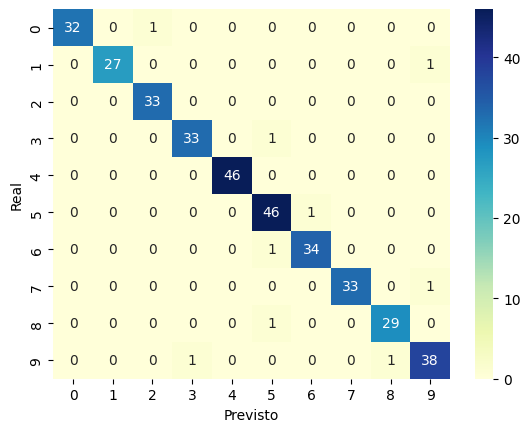

In [14]:
best_model = create_model(neurons1=128, neurons2=128, activation_function='relu')
best_model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(best_model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

12/12 [==============================] - 0s 1ms/step
Acurácia: 0.9833333333333333
Precisão (macro): 0.9840245610439297
Recall (macro): 0.9822280827224507
F1-Score (macro): 0.9830064387388159
Matriz de Confusão:


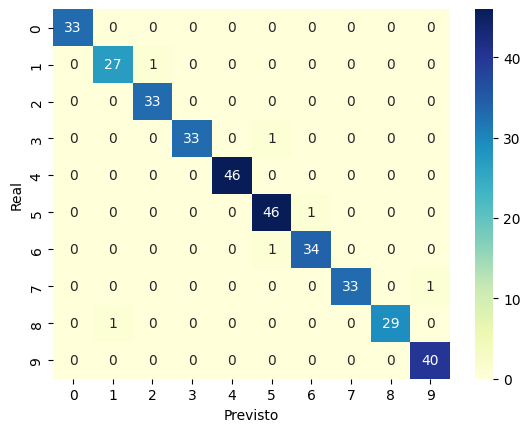

In [15]:
model = create_model(neurons1=64, neurons2=64, activation_function='relu')
model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

## Random Search

Como difere do Grid Search:

Em vez de testar todas as combinações possíveis, o Random Search testa uma quantidade determinada de combinações aleatórias de hiperparâmetros. Em nosso exemplo anterior de 3x3x2 combinações, em vez de testar todas as 18 combinações, podemos testar, digamos, 10 combinações aleatórias. Isso pode ser mais eficiente quando se tem um espaço de pesquisa muito grande.

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Definindo o espaço de hiperparâmetros
param_dist = {
    'neurons1': [64, 128, 256, 512],
    'neurons2': [64, 128, 256, 512],
    'activation_function': ['relu', 'tanh', 'softmax']
}

model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Configurando o RandomizedSearchCV com 10 iterações
random_search = RandomizedSearchCV(estimator=model_for_grid, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=3)

# Iniciando a busca pelos melhores hiperparâmetros usando o conjunto de treinamento
random_result = random_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result.best_params_}")


C:\Users\xx\AppData\Local\Temp\ipykernel_8816\3423523825.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)


Melhores parâmetros usando RandomizedSearchCV: {'neurons2': 512, 'neurons1': 512, 'activation_function': 'relu'}


Ao invés de testarmos 4x4x3 = 48 combinações , testamos 10 combinações aleatórias

12/12 [==============================] - 0s 1ms/step
Acurácia: 0.9833333333333333
Precisão (macro): 0.9833607847065894
Recall (macro): 0.9845051850527445
F1-Score (macro): 0.9838075571752178
Matriz de Confusão:


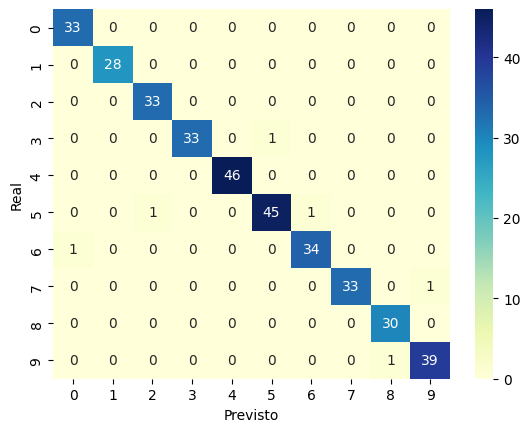

In [17]:
model = create_model(neurons1=128, neurons2=256, activation_function='relu')
model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

## Otimização Bayesiana com BayesianOptimization
A otimização bayesiana é uma técnica probabilística para encontrar o mínimo de funções. Diferente do Random Search, que faz uma busca aleatória pelo espaço de hiperparâmetros, a otimização bayesiana tenta racionalizar a melhor área do espaço a ser pesquisada com base em avaliações anteriores. Ela usa um processo gaussiano para fazer isso.

### Funcionamento Básico:
Modelo probabilístico: Um modelo probabilístico é construído com base nas funções e seus parâmetros avaliados anteriormente. Esse modelo é frequentemente um processo gaussiano.

Escolha do próximo ponto: Com base no modelo atual, escolhe-se o próximo ponto para avaliar. Isso não é apenas baseado em áreas onde a performance é boa, mas também onde a incerteza é alta. Assim, equilibra a exploração de novas áreas e a exploração de áreas conhecidas.

### Aplicação em Machine Learning:
Para otimização de hiperparâmetros, a função que queremos minimizar (ou maximizar) é geralmente a métrica de erro (ou acurácia) do nosso modelo. Por exemplo, se estamos treinando uma rede neural, a função tomará hiperparâmetros como entrada (como taxa de aprendizado, número de neurônios, etc.) e retornará o erro no conjunto de validação.

In [18]:
# %pip install bayesian-optimization

``Função Objetivo``: Precisamos definir a função que queremos otimizar. No nosso caso, essa função irá:
- Receber hiperparâmetros como entrada.
- Construir e treinar um modelo usando esses hiperparâmetros.
- Retornar a métrica de erro (ou acurácia).

``Limites dos Hiperparâmetros``: A otimização bayesiana requer que os hiperparâmetros tenham limites. Se for um hiperparâmetro contínuo (como a taxa de aprendizado), simplesmente definimos um intervalo. Para hiperparâmetros categóricos (como funções de ativação), usamos um truque: mapeamos cada categoria para um número (por exemplo, 'relu' para 0, 'tanh' para 1) e depois usamos esse índice como hiperparâmetro contínuo. Depois, na função objetivo, mapeamos o índice de volta à sua categoria original.

``Otimização``: Com a função objetivo e os limites definidos, podemos executar a otimização. Decidimos quantos pontos iniciais queremos (pontos escolhidos aleatoriamente antes de começar a otimização bayesiana) e quantas iterações de otimização queremos.

In [19]:
# Importando a biblioteca necessária
from bayes_opt import BayesianOptimization

# Definindo a função objetivo que queremos otimizar.
# Esta função treina um modelo com hiperparâmetros fornecidos e retorna a acurácia de validação.
def objective_function(neurons1, neurons2, activation_index):
    
    # Mapeia os índices para suas respectivas funções de ativação.
    activation_functions = ['relu', 'tanh']
    activation_function = activation_functions[int(activation_index)]
    
    # Cria e compila o modelo usando os hiperparâmetros fornecidos.
    model = create_model(int(neurons1), int(neurons2), activation_function)
    
    # Treina o modelo e obtém o histórico de treinamento.
    history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_split=0.2)
    
    # Obtém a acurácia de validação da última época.
    val_accuracy = history.history['val_accuracy'][-1]
    
    return val_accuracy

# Definindo os limites dos hiperparâmetros para a otimização bayesiana.
# Os hiperparâmetros contínuos têm intervalos definidos (por exemplo, neurons1 entre 64 e 256).
# Para hiperparâmetros categóricos, usamos índices (por exemplo, activation_index entre 0 e 1).
pbounds = {
    'neurons1': (64, 256),
    'neurons2': (64, 256),
    'activation_index': (0, 1)
}

# Inicializa o otimizador bayesiano com a função objetivo e os limites dos hiperparâmetros.
optimizer = BayesianOptimization(
    f=objective_function,     # Função objetivo definida anteriormente.
    pbounds=pbounds,          # Limites dos hiperparâmetros.
    random_state=1            # Semente para reprodutibilidade.
)

# Executa a otimização bayesiana.
# 'init_points' define quantos pontos iniciais aleatórios serão testados antes da otimização começar.
# 'n_iter' define quantas iterações de otimização serão executadas.
optimizer.maximize(init_points=5, n_iter=10)

# Exibe os melhores hiperparâmetros encontrados.
print(f"Melhores parâmetros usando otimização bayesiana: {optimizer.max['params']}")

|   iter    |  target   | activa... | neurons1  | neurons2  |
-------------------------------------------------------------
| 1         | 0.9722    | 0.417     | 202.3     | 64.02     |
| 2         | 0.9826    | 0.3023    | 92.18     | 81.73     |
| 3         | 0.9792    | 0.1863    | 130.3     | 140.2     |
| 4         | 0.9653    | 0.5388    | 144.5     | 195.6     |
| 5         | 0.9722    | 0.2045    | 232.6     | 69.26     |
| 6         | 0.9653    | 0.1125    | 92.89     | 82.53     |
| 7         | 0.9618    | 0.5323    | 215.2     | 97.58     |
| 8         | 0.9792    | 0.5958    | 114.1     | 207.4     |
| 9         | 0.9583    | 0.2275    | 93.87     | 245.9     |
| 10        | 0.9514    | 0.7263    | 203.9     | 101.4     |
| 11        | 0.9757    | 0.4702    | 145.3     | 154.6     |
| 12        | 0.9618    | 0.9554    | 191.5     | 154.4     |
| 13        | 0.9688    | 0.4887    | 225.5     | 252.0     |
| 14        | 0.9514    | 0.3225    | 210.6     | 228.5     |
| 15    


"'activation_index': 0.48873272287485325:

Este valor contínuo representa a função de ativação selecionada para o modelo. Na implementação, duas funções de ativação ('relu' e 'tanh') foram mapeadas para os índices 0 e 1, respectivamente.
O valor 0.4887 é mais próximo de 0 do que de 1. Portanto, ao arredondar, o índice 0 é selecionado, correspondendo à função de ativação 'relu'.

'neurons1': 225.5063053565966:

Representa o número ideal de neurônios na primeira camada oculta identificado pelo otimizador bayesiano.
Em uma implementação prática, esse número seria arredondado para 226 neurônios na primeira camada oculta.

'neurons2': 251.9811401659988:

Indica o número ideal de neurônios para a segunda camada oculta.
Ao arredondar, resulta em uma segunda camada oculta com 252 neurônios."

# Exercício

In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv('notebooks.csv')

In [21]:
df.head()

,marca,ano,qtd_nucleos,qtd_threads,ram,gpu_dedicada,ram_gpu,entradas_usb,duracao_bateria,resolucao_tela,tipo_tela,tela_touch,armazenamento_hdd,armazenamento_ssd,segmento,valor
0,xiaomi,2012,12,19,16,não,0,2,434,FULLHD,OLED,não,0,2000,premium,18215
1,dell,2014,6,8,6,não,0,2,566,FULLHD,TN,não,500,1000,ultraportatil,18904
2,asus,2022,6,12,12,não,0,3,281,FULLHD,AMOLED,sim,0,500,2em1,14217
3,xiaomi,2014,8,9,16,não,0,3,473,QUADHD,OLED,não,2000,250,premium,19607
4,asus,2023,10,10,8,não,0,3,506,QUADHD,OLED,não,0,1000,premium,19841


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.describe(include = 'O').columns:
    df[i] = le.fit_transform(df[i])

In [23]:
X = df.drop('valor', axis = 1)
y = df[['valor']]

In [24]:
X = np.asarray(X)
y = np.asarray(y)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exercícios para GridSearch:

### 1. Modelo Básico:
- Crie um modelo sequencial simples com uma camada oculta e compile-o usando
MSE (Erro Quadrático Médio) como função de perda. Use o GridSearchCV para
encontrar a melhor função de ativação para essa camada oculta entre ['relu',
'tanh', 'sigmoid'].

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import MeanSquaredError

def create_model(neurons1 = 64, activation_function = 'relu'):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)

param_grid = {
    'activation_function': ['relu', 'tanh', 'sigmoid']
}

grid = GridSearchCV(estimator = model_for_grid, param_grid = param_grid, cv = 3)

grid_result = grid.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\113293906.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


Melhores parâmetros: {'activation_function': 'relu'}


### 2. Otimizando a Arquitetura:
- Use o GridSearchCV para encontrar a melhor combinação de neurônios em duas
camadas ocultas. Teste combinações entre [32, 64, 128] neurônios para cada
camada.

In [28]:
def create_model(neurons1 = 64, neurons2 = 64, activation_function = 'relu'):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function))
    model.add(Dense(neurons2, activation = activation_function))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [29]:
model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


param_grid = {
    'neurons1': [32, 64, 128],
    'neurons2': [32, 64, 128]
}

grid = GridSearchCV(estimator = model_for_grid, param_grid = param_grid, cv = 3)

grid_result = grid.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\319167078.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


Melhores parâmetros: {'neurons1': 32, 'neurons2': 32}


### 3. Otimizando o Otimizador:
- Mantendo a arquitetura do modelo fixa, utilize o GridSearchCV para encontrar o
melhor otimizador entre ['adam', 'sgd', 'rmsprop'].

In [32]:
def create_model(neurons1 = 32, neurons2 = 32, activation_function = 'relu', optimizer = 'adam'):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function))
    model.add(Dense(neurons2, activation = activation_function))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [33]:
model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

grid = GridSearchCV(estimator = model_for_grid, param_grid = param_grid, cv = 3)

grid_result = grid.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\2348818482.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


Melhores parâmetros: {'optimizer': 'adam'}


### 4. Batch Size e Epochs:
- Determine o melhor batch_size e número de epochs usando o GridSearchCV.
Teste para batch_size em [32, 64, 128] e epochs em [10, 20, 30].

In [34]:
def create_model(neurons1 = 32, neurons2 = 32, activation_function = 'relu', optimizer = 'adam'):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function))
    model.add(Dense(neurons2, activation = activation_function))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [35]:
model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 32, verbose = 0)


param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}

grid = GridSearchCV(estimator = model_for_grid, param_grid = param_grid, cv = 3)

grid_result = grid.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\2554534723.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 32, verbose = 0)


Melhores parâmetros: {'batch_size': 32, 'epochs': 10}


### 5. Regularização:
- Use o GridSearchCV para encontrar o melhor valor para a regularização L2 (use
keras.regularizers.l2) para uma camada oculta. Teste valores como [0.01, 0.001,
0.0001].

In [45]:
from keras.regularizers import l2

def create_model(neurons1 = 32, neurons2 = 32, activation_function = 'relu', optimizer = 'adam', reg = 0.01):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function))
    model.add(Dense(neurons2, activation = activation_function, activity_regularizer = l2(reg)))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [46]:
model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 32, verbose = 0, reg = 0.01)


param_grid = {
    'reg': [0.01, 0.001, 0.0001]
}

grid = GridSearchCV(estimator = model_for_grid, param_grid = param_grid, cv = 3)

grid_result = grid.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\1185696515.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 32, verbose = 0, reg = 0.01)


Melhores parâmetros: {'reg': 0.01}


## Exercícios para RandomizedSearch:

### 6. Função de Ativação Aleatória:
* Semelhante ao exercício 1, mas agora usando RandomizedSearchCV para
selecionar aleatoriamente a melhor função de ativação.

In [48]:
def create_model(neurons1 = 32, neurons2 = 32, activation_function = 'relu', optimizer = 'adam', reg = 0.01):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function))
    model.add(Dense(neurons2, activation = activation_function, activity_regularizer = l2(reg)))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [49]:
from sklearn.model_selection import RandomizedSearchCV

model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)

param_dist = {
    'activation_function': ['relu', 'tanh', 'softmax']
}

random_search = RandomizedSearchCV(estimator = model_for_grid, param_distributions = param_dist, n_iter = 10, cv=3)

random_result = random_search.fit(X_train, y_train)

print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result.best_params_}")

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\3382902740.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


Melhores parâmetros usando RandomizedSearchCV: {'activation_function': 'relu'}


### 7. Arquitetura Aleatória:
* Use o RandomizedSearchCV para encontrar uma combinação ótima de neurônios
em três camadas ocultas. Permita que qualquer valor entre 10 e 150 neurônios
seja testado para cada camada.

In [63]:
def create_model(neurons1 = 32, neurons2 = 32, neurons3 = 32, activation_function = 'relu', optimizer = 'adam', reg = 0.01):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function))
    model.add(Dense(neurons2, activation = activation_function, activity_regularizer = l2(reg)))
    model.add(Dense(neurons3, activation = activation_function, activity_regularizer = l2(reg)))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [65]:
model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)

param_dist = {
    'neurons1': [10, 50, 150],
    'neurons2': [10, 50, 150],
    'neurons3': [10, 50, 150]
}

random_search = RandomizedSearchCV(estimator = model_for_grid, param_distributions = param_dist, n_iter = 10, cv = 3)

random_result = random_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {random_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\2939061847.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)
C:\Users\xx\AppData\Local\Temp\ipykernel_8816\2939061847.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


Melhores parâmetros: {'neurons3': 10, 'neurons2': 150, 'neurons1': 150}


### 8. Otimizador Aleatório:
* Similar ao exercício 3, mas agora usando RandomizedSearchCV.

In [72]:
def create_model(neurons1 = 150, neurons2 = 150, neurons3 = 10, activation_function = 'relu', optimizer = 'adam', reg = 0.01):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function))
    model.add(Dense(neurons2, activation = activation_function, activity_regularizer = l2(reg)))
    model.add(Dense(neurons3, activation = activation_function, activity_regularizer = l2(reg)))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [73]:
model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)

param_dist = {
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

random_search = RandomizedSearchCV(estimator = model_for_grid, param_distributions = param_dist, n_iter = 10, cv = 3)

random_result = random_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {random_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\1865325406.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


Melhores parâmetros: {'optimizer': 'adam'}


### 9. Iniciação de Pesos:
* Use o RandomizedSearchCV para testar diferentes inicializações de peso
['uniform', 'normal', 'zero'] em sua camada oculta.

In [76]:
def create_model(neurons1 = 10, neurons2 = 50, neurons3 = 50, activation_function = 'relu', optimizer = 'adam', reg = 0.01, kernel_initializer = 'uniform'):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function, kernel_initializer = 'uniform'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [77]:
model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)

param_dist = {
    'kernel_initializer': ['uniform', 'normal', 'zero']
}

random_search = RandomizedSearchCV(estimator = model_for_grid, param_distributions = param_dist, n_iter = 10, cv = 3)

random_result = random_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {random_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\2227252951.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0)


Melhores parâmetros: {'kernel_initializer': 'uniform'}


### 10. Taxa de Aprendizado:
* Se usar o otimizador 'adam', teste diferentes taxas de aprendizado entre 0.001 e 0.1
usando RandomizedSearchCV.

In [84]:
def create_model(neurons1 = 10, neurons2 = 50, neurons3 = 50, activation_function = 'relu', optimizer = 'adam', reg = 0.01, kernel_initializer = 'uniform', learning_rate = 0.001):
    
    model = Sequential()

    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation = activation_function, kernel_initializer = 'uniform'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
    
    return model

In [86]:
model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0, learning_rate = 0.001)

param_dist = {
    'learning_rate': [0.001, 0.01, 0.1]
}

random_search = RandomizedSearchCV(estimator = model_for_grid, param_distributions = param_dist, n_iter = 10, cv = 3)

random_result = random_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {random_result.best_params_}')

C:\Users\xx\AppData\Local\Temp\ipykernel_8816\4103602608.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn = create_model, epochs = 20, verbose = 0, learning_rate = 0.001)
c:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros: {'learning_rate': 0.001}


## Exercícios para Otimização Bayesiana:

### 11. Função de Ativação Bayesiana:
* Implemente uma função objetivo para otimizar a função de ativação da camada oculta e
use a Otimização Bayesiana para encontrar a melhor.

In [99]:
def objective_function(neurons1 = 32, neurons2 = 32, activation_index = 0):

    activation_functions = ['relu', 'tanh', 'sigmoid']
    activation_function = activation_functions[int(activation_index)]
    
    model = create_model(int(neurons1), int(neurons2), activation_function)
    
    history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_split=0.2)
    
    val_accuracy = history.history['val_accuracy'][-1]
    
    return val_accuracy

In [101]:
pbounds = {
    'neurons1': (32, 32),
    'neurons2': (32, 32),
    'activation_index': (0, 2)
}

optimizer = BayesianOptimization(
    f = objective_function,
    pbounds = pbounds,
    random_state = 1
)

optimizer.maximize(init_points = 5, n_iter = 10)

print(f"Melhores parâmetros usando otimização bayesiana: {optimizer.max['params']}")

|   iter    |  target   | activa... | neurons1  | neurons2  |
-------------------------------------------------------------
| 1         | 0.0       | 0.834     | 32.0      | 32.0      |
| 2         | 0.0       | 0.6047    | 32.0      | 32.0      |
| 3         | 0.0       | 0.3725    | 32.0      | 32.0      |
| 4         | 0.0       | 1.078     | 32.0      | 32.0      |
| 5         | 0.0       | 0.4089    | 32.0      | 32.0      |
| 6         | 0.0       | 2.0       | 32.0      | 32.0      |
| 7         | 0.0       | 2.0       | 32.0      | 32.0      |
| 8         | 0.0       | 0.00073   | 32.0      | 32.0      |
| 9         | 0.0       | 1.999     | 32.0      | 32.0      |
| 10        | 0.0       | 7.284e-05 | 32.0      | 32.0      |
| 11        | 0.0       | 2.0       | 32.0      | 32.0      |
| 12        | 0.0       | 0.0004259 | 32.0      | 32.0      |
| 13        | 0.0       | 2.0       | 32.0      | 32.0      |
| 14        | 0.0       | 0.0007079 | 32.0      | 32.0      |
| 15    

### 12. Otimização da Arquitetura:
* Use a Otimização Bayesiana para encontrar a melhor combinação de neurônios em duas
camadas ocultas. Defina os limites entre 10 e 150 neurônios.

In [102]:
pbounds = {
    'neurons1': (10, 150),
    'neurons2': (10, 150),
}

optimizer = BayesianOptimization(
    f = objective_function,
    pbounds = pbounds,
    random_state = 1
)

optimizer.maximize(init_points = 5, n_iter = 10)

print(f"Melhores parâmetros usando otimização bayesiana: {optimizer.max['params']}")

|   iter    |  target   | neurons1  | neurons2  |
-------------------------------------------------
| 1         | 0.0       | 68.38     | 110.8     |
| 2         | 0.0       | 10.02     | 52.33     |
| 3         | 0.0       | 30.55     | 22.93     |
| 4         | 0.0       | 36.08     | 58.38     |
| 5         | 0.0       | 65.55     | 85.43     |
| 6         | 0.0       | 149.7     | 13.5      |
| 7         | 0.0       | 148.8     | 149.9     |
| 8         | 0.0       | 10.78     | 149.0     |
| 9         | 0.0       | 149.6     | 10.57     |
| 10        | 0.0       | 148.9     | 150.0     |
| 11        | 0.0       | 10.64     | 147.9     |
| 12        | 0.0       | 11.02     | 11.0      |
| 13        | 0.0       | 149.8     | 11.5      |
| 14        | 0.0       | 146.8     | 149.8     |
| 15        | 0.0       | 11.44     | 149.5     |
Melhores parâmetros usando otimização bayesiana: {'neurons1': 68.38308065836037, 'neurons2': 110.84542908190214}


### 13. Otimizador Bayesiano:
* Determine o melhor otimizador, transformando seus índices em um espaço contínuo e
usando Otimização Bayesiana.

### 14. Dropout:
* Use a Otimização Bayesiana para encontrar a melhor taxa de dropout após cada camada
oculta. Teste valores entre 0 e 0.5.

### 15. Taxa de Aprendizado Bayesiana:
* Optimize a taxa de aprendizado do otimizador 'adam' usando Otimização Bayesiana. Teste
valores entre 0.0001 e 0.1.